## Setup

In [1]:
SCOPETYPE = 'CWNANO'
PLATFORM = 'CWNANO'
SS_VER='SS_VER_1_1'

In [2]:
%run "Setup_Scripts/Setup_Generic.ipynb"

INFO: Found ChipWhisperer😍


In [3]:
scope.io.clkout = 7500000
scope.adc.clk_freq = 7500000
scope.adc.samples = 100000
print(scope.io.clkout)
print(scope.adc.clk_freq)

7500000.0
7500000.0


In [4]:
print(scope)
print(target)

ChipWhisperer Nano Device
fw_version = 
    major = 0
    minor = 50
    debug = 0
io = 
    tio1         = None
    tio2         = None
    tio3         = None
    tio4         = high_z
    pdid         = True
    pdic         = False
    nrst         = True
    clkout       = 7500000.0
    cdc_settings = bytearray(b'\x01\x00\x00\x00')
adc = 
    clk_src  = int
    clk_freq = 7500000.0
    samples  = 100000
glitch = 
    repeat     = 0
    ext_offset = 0

SimpleSerial Settings =
	output_len             = 16
	baud                   = 38400
	simpleserial_last_read = 
	simpleserial_last_sent = 
	


## Capture traces

### Capture all state trace

In [3]:
from tqdm.notebook import tnrange
import numpy as np
import time

trace_array = []
states = ["ldr-state", "str-state", "eors-state", "movs-state", "no-state"]

N = 5
for i in tnrange(N, desc='Capturing traces'):

    trace_array = []
    
    print("Programming target with {}.hex".format(states[i]))
    cw.program_target(scope, prog, "{}.hex".format(states[i]))
    
    scope.arm()
    
    ret = scope.capture()
    if ret:
        print("Target timed out!")
        continue
        
    trace_array.append(scope.get_last_trace())
    
    with open('{}.npy'.format(states[i]), 'wb') as f:
        np.save(f, trace_array)

Capturing traces:   0%|          | 0/5 [00:00<?, ?it/s]

Programming target with ldr-state.hex
Serial baud rate = 115200
Detected known STMF32: STM32F03xx4/03xx6
Extended erase (0x44), this can take ten seconds or more
Attempting to program 9663 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 9663 bytes
Serial baud rate = 38400
Programming target with str-state.hex
Serial baud rate = 115200
Detected known STMF32: STM32F03xx4/03xx6
Extended erase (0x44), this can take ten seconds or more
Attempting to program 9713 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 9713 bytes
Serial baud rate = 38400
Programming target with eors-state.hex
Serial baud rate = 115200
Detected known STMF32: STM32F03xx4/03xx6
Extended erase (0x44), this can take ten seconds or more
Attempting to program 9713 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 9713 bytes
Serial baud rate = 38400
Programming target with movs-state.hex
Serial baud rat

### DEBUG: Capture LDR-STATE trace

In [17]:
%%bash -s "$PLATFORM" "$SS_VER"
cd ../hardware/victims/firmware/elmo-modeller-ldr
make PLATFORM=$1 CRYPTO_TARGET=NONE SS_VER=$2

./backup-hex.sh
rm -f -- ldr-state-CWNANO.hex
rm -f -- ldr-state-CWNANO.eep
rm -f -- ldr-state-CWNANO.cof
rm -f -- ldr-state-CWNANO.elf
rm -f -- ldr-state-CWNANO.map
rm -f -- ldr-state-CWNANO.sym
rm -f -- ldr-state-CWNANO.lss
rm -f -- objdir/*.o
rm -f -- objdir/*.lst
rm -f -- ldr-state.s simpleserial.s stm32f0_hal_nano.s stm32f0_hal_lowlevel.s
rm -f -- ldr-state.d simpleserial.d stm32f0_hal_nano.d stm32f0_hal_lowlevel.d
rm -f -- ldr-state.i simpleserial.i stm32f0_hal_nano.i stm32f0_hal_lowlevel.i
echo Compiling C: ldr-state.c
Compiling C: ldr-state.c
arm-none-eabi-gcc -c -mcpu=cortex-m0 -I. -mthumb -mfloat-abi=soft -ffunction-sections -gdwarf-2 -DSS_VER=SS_VER_1_1 -DSTM32F030x6 -DSTM32F0 -DSTM32 -DDEBUG -DHAL_TYPE=HAL_stm32f0_nano -DPLATFORM=CWNANO -DF_CPU=7372800UL -DSS_VER_2_0=2 -DSS_VER_1_1=1 -DSS_VER_1_0=0 -O0 -funsigned-char -funsigned-bitfields -fshort-enums -Wall -Wstrict-prototypes -Wa,-adhlns=objdir/ldr-state.lst -I.././simpleserial/ -I.././hal -I.././hal/stm32f0 -I.././hal/st

ldr-state.c: In function 'main':
ldr-state.c:37:34: warning: passing argument 3 of 'simpleserial_addcmd' from incompatible pointer type [-Wincompatible-pointer-types]
   37 |     simpleserial_addcmd('p', 16, get_pt);
      |                                  ^~~~~~
      |                                  |
      |                                  void (*)(uint8_t *, uint8_t) {aka void (*)(unsigned char *, unsigned char)}
In file included from ldr-state.c:17:
.././simpleserial/simpleserial.h:43:61: note: expected 'uint8_t (*)(uint8_t *, uint8_t)' {aka 'unsigned char (*)(unsigned char *, unsigned char)'} but argument is of type 'void (*)(uint8_t *, uint8_t)' {aka 'void (*)(unsigned char *, unsigned char)'}
   43 | int simpleserial_addcmd(char c, unsigned int len, uint8_t (*fp)(uint8_t*, uint8_t));
      |                                                   ~~~~~~~~~~^~~~~~~~~~~~~~~~~~~~~~


In [18]:
! md5sum ../hardware/victims/firmware/elmo-modeller-ldr/ldr-state-CWNANO.hex
cw.program_target(scope, cw.programmers.STM32FProgrammer, "../hardware/victims/firmware/elmo-modeller-ldr/ldr-state-CWNANO.hex")

4a4f9abdd04f86eba1d3ba6133bba1dc  ../hardware/victims/firmware/elmo-modeller-ldr/ldr-state-CWNANO.hex
Detected known STMF32: STM32F03xx4/03xx6
Extended erase (0x44), this can take ten seconds or more
Attempting to program 9135 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 9135 bytes


In [19]:
from tqdm.notebook import tnrange
import numpy as np
import time

trace_array = []

reset_target(scope)

text = bytearray([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]) 

N = 10
for i in tnrange(N, desc='Capturing traces'):
    target.flush()
    scope.arm()
    
    target.simpleserial_write('p', text)
    
    ret = scope.capture()
    
    if ret:
        print("Target timed out!")
        continue
    
    #response = target.simpleserial_read('r', 32)
    #print(response)
        
    trace_array.append(scope.get_last_trace())

Capturing traces:   0%|          | 0/10 [00:00<?, ?it/s]

## Visualise traces

<IPython.core.display.Javascript object>


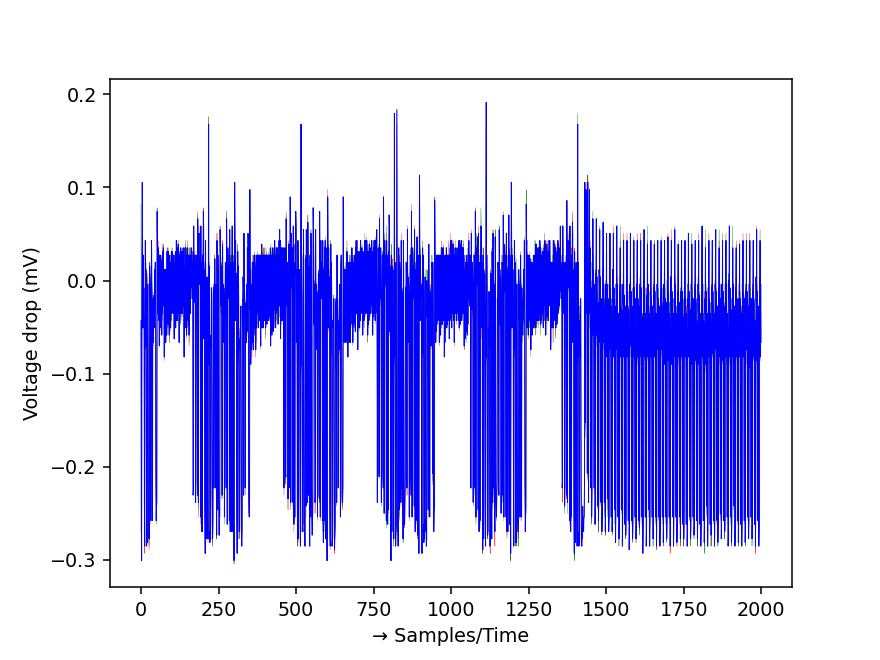

In [20]:
%matplotlib notebook
import matplotlib.pylab as plt

plt.figure(dpi=125)
plt.xlabel("→ Samples/Time")
plt.ylabel("Voltage drop (mV)")
#plt.plot(wave[:], 'g', linewidth=0.2)
plt.plot(trace_array[0][:2000], 'r', linewidth=0.2)
plt.plot(trace_array[1][:2000], 'g', linewidth=0.2)
plt.plot(trace_array[2][:2000], 'b', linewidth=0.5)
plt.show()

<IPython.core.display.Javascript object>


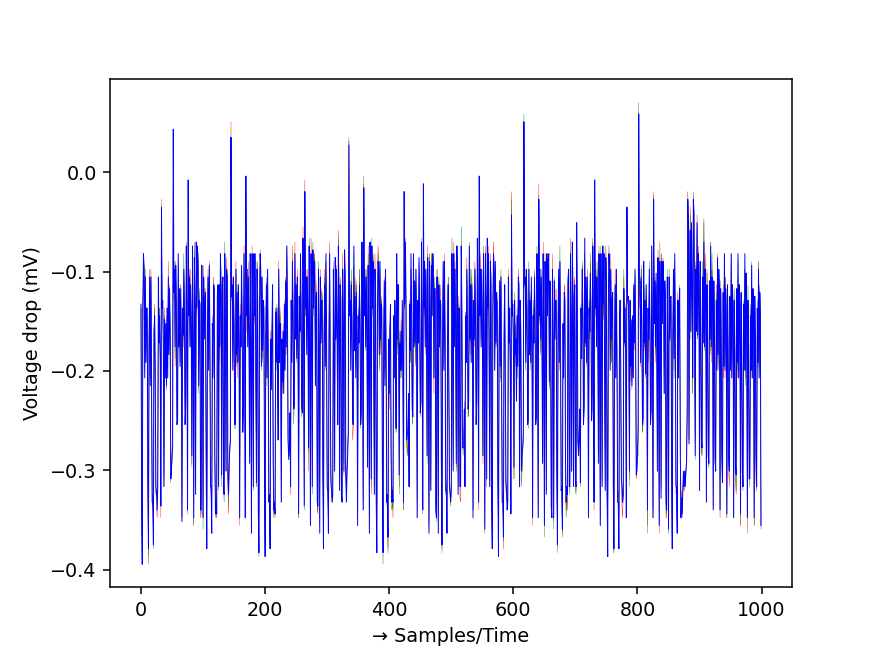

In [192]:
%matplotlib notebook
import matplotlib.pylab as plt

plt.figure(dpi=125)
plt.xlabel("→ Samples/Time")
plt.ylabel("Voltage drop (mV)")
#plt.plot(wave[:], 'g', linewidth=0.2)
plt.plot(trace_array[0][:1000], 'r', linewidth=0.2)
plt.plot(trace_array[1][:1000], 'g', linewidth=0.2)
plt.plot(trace_array[2][:1000], 'b', linewidth=0.5)
plt.show()

<IPython.core.display.Javascript object>


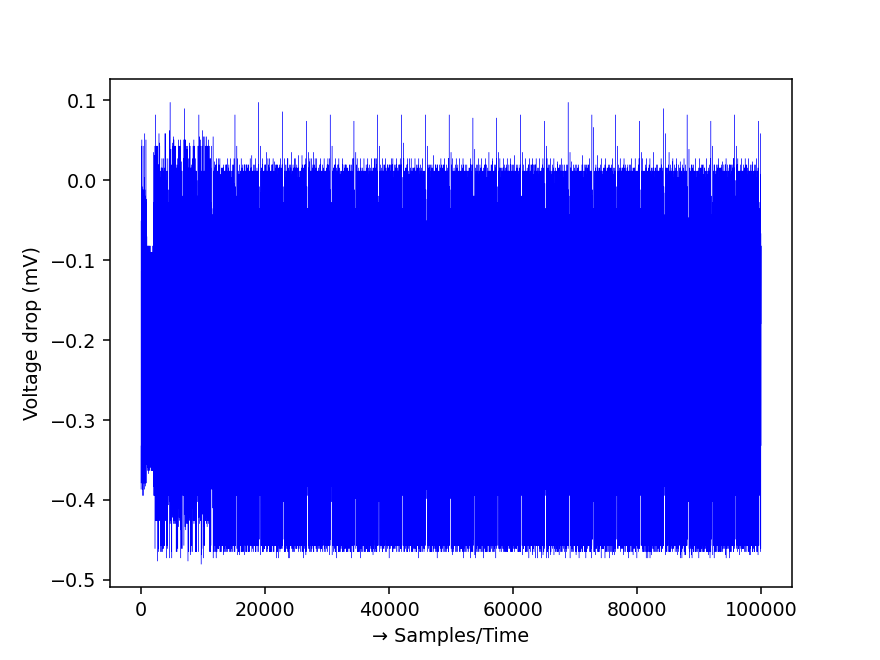

In [204]:
%matplotlib notebook
import matplotlib.pylab as plt

plt.figure(dpi=125)
plt.xlabel("→ Samples/Time")
plt.ylabel("Voltage drop (mV)")
#plt.plot(wave[:], 'g', linewidth=0.2)
plt.plot(trace_array[0][:], 'b', linewidth=0.2)
#plt.plot(trace_array[1][:1000], 'g', linewidth=0.5)
#plt.plot(trace_array[2][:1000], 'r', linewidth=0.5)
plt.show()

In [60]:
%matplotlib notebook
import matplotlib
import matplotlib.pylab as plt
import numpy as np
import pdflatex

matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

trace_array = np.load("/home/samiko/Desktop/rosita/cwmodel/ldr-state/traces/ldr-state-1-2-3.npy")

fig = plt.figure(dpi=125)
plt.xlabel("→ Samples/Time")
plt.ylabel("Voltage drop (mV)")

plt.plot(trace_array[0][:], 'b', linewidth=0.5)
plt.plot(trace_array[1][:], 'g', linewidth=0.5)
plt.plot(trace_array[2][:], 'r', linewidth=0.5)
plt.xlim([120, 180])
plt.ylim([-0.275, 0.125])

rect=mpatches.Rectangle((155.2,-0.3),3.5,0.5, 
                        #fill = False,
                        facecolor = "red",
                        alpha=0.1,
                        linewidth = 1)
plt.gca().add_patch(rect)

fig.set_size_inches(w=3.6, h=2.4)
plt.tight_layout()

plt.savefig("ldr-1-2-3.pgf")

In [84]:
%matplotlib notebook
import matplotlib
import matplotlib.pylab as plt
import numpy as np
import pdflatex

matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

tvals1 = np.loadtxt("/home/samiko/Desktop/rosita/aes-control-tvals.txt")
fig = plt.figure(dpi=125)
plt.xlabel("Cycle")
plt.ylabel(r"\textit{t}-test value")
plt.xlim([0, 1170])
plt.ylim([-20, 20])

plt.plot(tvals1, 'g', linewidth=0.5)
plt.hlines(4.5, 0, 1300, color='red', linewidth=0.5)
plt.hlines(-4.5, 0, 1300, color='red', linewidth=0.5)

fig.set_size_inches(w=3.6, h=2.4)
plt.tight_layout()

plt.savefig("aes-control-tvals.pgf")

In [83]:
%matplotlib notebook
import matplotlib
import matplotlib.pylab as plt
import numpy as np
import pdflatex

matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

tvals2 = np.loadtxt("/home/samiko/Desktop/rosita/aes-test-tvals.txt")
fig = plt.figure(dpi=125)
plt.xlabel("Cycle")
plt.ylabel(r"\textit{t}-test value")
plt.xlim([0, 1170])
plt.ylim([-20, 20])

plt.plot(tvals2, 'g', linewidth=0.5)
plt.hlines(4.5, 0, 1300, color='red', linewidth=0.5)
plt.hlines(-4.5, 0, 1300, color='red', linewidth=0.5)

fig.set_size_inches(w=3.6, h=2.4)
plt.tight_layout() 

plt.savefig("aes-test-tvals.pgf")

In [82]:
%matplotlib notebook
import matplotlib
import matplotlib.pylab as plt
import numpy as np
import pdflatex

matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

tvals1 = np.loadtxt("/home/samiko/Desktop/rosita/aes-fixed-control-tvals.txt")
fig = plt.figure(dpi=125)
plt.xlabel("Cycle")
plt.ylabel(r"\textit{t}-test value")
plt.xlim([0, 1300])
plt.ylim([-20, 20])

plt.plot(tvals1, 'g', linewidth=0.5)
plt.hlines(4.5, 0, 1300, color='red', linewidth=0.5)
plt.hlines(-4.5, 0, 1300, color='red', linewidth=0.5)

fig.set_size_inches(w=3.6, h=2.4)
plt.tight_layout() 

plt.savefig("aes-fixed-control-tvals.pgf")

In [81]:
%matplotlib notebook
import matplotlib
import matplotlib.pylab as plt
import numpy as np
import pdflatex

matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

tvals2 = np.loadtxt("/home/samiko/Desktop/rosita/aes-fixed-test-tvals.txt")
fig = plt.figure(dpi=125)
plt.xlabel("Cycle")
plt.ylabel(r"\textit{t}-test value")
plt.xlim([0, 1300])
plt.ylim([-20, 20])

plt.plot(tvals2, 'g', linewidth=0.5)
plt.hlines(4.5, 0, 1300, color='red', linewidth=0.5)
plt.hlines(-4.5, 0, 1300, color='red', linewidth=0.5)

fig.set_size_inches(w=3.6, h=2.4)
plt.tight_layout() 

plt.savefig("aes-fixed-test-tvals.pgf")

## Disarm scope and target

In [172]:
scope.dis()
target.dis()